In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation

    Downloading the dataset
    Re-encoding the categorical variables
    Doing the train/validation/test split



In [112]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [113]:
!wget $data

--2021-10-16 09:04:22--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.1'

     0K .......... .......... .......... .......... .......... 28%  938K 0s
    50K .......... .......... .......... .......... .......... 56% 1.17M 0s
   100K .......... .......... .......... .......... .......... 84%  974K 0s
   150K .......... .......... ........                        100% 13.0M=0.1s

2021-10-16 09:04:23 (1.17 MB/s) - 'CreditScoring.csv.1' saved [182489/182489]



In [114]:
!head CreditScoring.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [115]:
df = pd.read_csv(data)

In [116]:
df.columns = df.columns.str.lower()

In [117]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [118]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [119]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [120]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [121]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [122]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)
    

In [123]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [124]:
df = df[df.status!='unk'].reset_index(drop=True)

In [125]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val= train_test_split(df_full_train,test_size=0.25,random_state=11)

In [127]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [128]:
y_train = (df_train.status=='default').astype('int').values
y_val = (df_val.status=='default').astype('int').values
y_test = (df_test.status=='default').astype('int').values

In [129]:
del df_train['status']
del df_val['status']
del df_test['status']

In [130]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 6.3 Decision trees

    How a decision tree looks like
    Training a decision tree
    Overfitting
    Controlling the size of a tree



In [131]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] =='parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] >6000:
            return 'ok'
        else:
            return 'default'
    

In [132]:
#sample basic func
cus_dic = {}
for i in range(len(df_train)):
    cus_dic["client%s" %i] = assess_risk(df_train.iloc[i].to_dict())
cus_dic

{'client0': 'ok',
 'client1': 'ok',
 'client2': 'default',
 'client3': 'default',
 'client4': 'default',
 'client5': 'ok',
 'client6': 'default',
 'client7': 'default',
 'client8': 'default',
 'client9': 'default',
 'client10': 'ok',
 'client11': 'default',
 'client12': 'default',
 'client13': 'default',
 'client14': 'default',
 'client15': 'default',
 'client16': 'default',
 'client17': 'default',
 'client18': 'default',
 'client19': 'default',
 'client20': 'default',
 'client21': 'default',
 'client22': 'default',
 'client23': 'default',
 'client24': 'ok',
 'client25': 'default',
 'client26': 'default',
 'client27': 'default',
 'client28': 'ok',
 'client29': 'default',
 'client30': 'ok',
 'client31': 'ok',
 'client32': 'default',
 'client33': 'default',
 'client34': 'default',
 'client35': 'default',
 'client36': 'ok',
 'client37': 'ok',
 'client38': 'default',
 'client39': 'default',
 'client40': 'ok',
 'client41': 'default',
 'client42': 'default',
 'client43': 'default',
 'client4

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [134]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)

In [135]:
X_train = dv.fit_transform(train_dicts)

In [136]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [137]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [139]:
y_pred = dt.predict_proba(X_val)[:,1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [140]:
(y_val==y_pred).mean()

0.7306397306397306

In [141]:
roc_auc_score(y_val,y_pred)

0.6542224697876051

In [142]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [143]:
y_pred = dt.predict_proba(X_train)[:,1]
auc1 = roc_auc_score(y_train,y_pred)
print("train:",auc1)

y_pred = dt.predict_proba(X_val)[:,1]
auc2 = roc_auc_score(y_val,y_pred)
print("val:",auc2)

train: 0.8433781899611289
val: 0.7669377103969388


In [144]:
from sklearn.tree import export_text

In [145]:
print(export_text(dt,feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- income <= 50.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  50.50
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  132.50
|   |   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- time <= 54.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- time >  54.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   |   |--- i

## 6.4 Decision tree learning algorithm

    Finding the best split for one column
    Finding the best split for the entire dataset
    Stopping criteria
    Decision tree learning algorithm



In [146]:
data =[
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
    
]

In [147]:
df_example = pd.DataFrame(data,columns=['assets','risk'])
df_example

,assets,risk
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [148]:
df_example = df_example.sort_values('assets')

In [149]:
df_example

,assets,risk
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [150]:
ts =[0, 2000, 3000, 4000, 5000, 8000]

In [151]:
from IPython.display import display

In [152]:
for T in ts:
    print(T,"\n")
    
    df_left = df_example[df_example.assets<=T]
    df_right = df_example[df_example.assets>T]
    
    display(df_left)
    display(df_right)
    
    print()

0 



,assets,risk
2,0,default


,assets,risk
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok



2000 



,assets,risk
2,0,default
1,2000,default


,assets,risk
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok



3000 



,assets,risk
2,0,default
1,2000,default
7,3000,default


,assets,risk
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok



4000 



,assets,risk
2,0,default
1,2000,default
7,3000,default
5,4000,ok


,assets,risk
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok



5000 



,assets,risk
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok


,assets,risk
0,8000,default
6,9000,ok



8000 



,assets,risk
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default


,assets,risk
6,9000,ok


In [153]:
data2 =[
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

In [154]:
df_ex2 = pd.DataFrame(data2,columns=['assets','debt','status'])

In [155]:
thresholds = {
    'assets' : [0, 2000, 3000, 4000, 5000, 8000],
    'debt' : [500,1000,2000]
}

In [156]:

for feature,ts in thresholds.items():
    for t in ts:
        print("##############\n")
        print("Feature : %s , Threshold : %s" %(feature,t))
    

        df_left = df_ex2[df_ex2[feature]<=t]
        df_right = df_ex2[df_ex2[feature]>t]
           
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()

        

        

##############

Feature : assets , Threshold : 0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

##############

Feature : assets , Threshold : 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

##############

Feature : assets , Threshold : 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

##############

Feature : assets , Threshold : 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

##############

Feature : assets , Threshold : 5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

##############

Feature : assets , Threshold : 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

##############

Feature : debt , Threshold : 500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

##############

Feature : debt , Threshold : 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

##############

Feature : debt , Threshold : 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64




## 6.5 Decision trees parameter tuning¶

    selecting max_depth
    selecting min_samples_leaf




In [157]:
for d in [1,2,3,4,5,6,10,15,20,25,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)

    print("Depth %4s ---> %.3f" %(d,auc))

Depth    1 ---> 0.606
Depth    2 ---> 0.669
Depth    3 ---> 0.739
Depth    4 ---> 0.761
Depth    5 ---> 0.766
Depth    6 ---> 0.747
Depth   10 ---> 0.709
Depth   15 ---> 0.672
Depth   20 ---> 0.657
Depth   25 ---> 0.654
Depth None ---> 0.659


In [158]:
scores = []

for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
         dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
         dt.fit(X_train,y_train)

         y_pred = dt.predict_proba(X_val)[:,1]
         auc = roc_auc_score(y_val,y_pred)
         scores.append((d,s,auc))

         print("Depth (%4s,%3d) ---> %.3f" %(d,s,auc)) 

Depth (   4,  1) ---> 0.761
Depth (   4,  2) ---> 0.761
Depth (   4,  5) ---> 0.761
Depth (   4, 10) ---> 0.761
Depth (   4, 15) ---> 0.764
Depth (   4, 20) ---> 0.761
Depth (   4,100) ---> 0.756
Depth (   4,200) ---> 0.747
Depth (   4,500) ---> 0.680
Depth (   5,  1) ---> 0.766
Depth (   5,  2) ---> 0.767
Depth (   5,  5) ---> 0.768
Depth (   5, 10) ---> 0.762
Depth (   5, 15) ---> 0.773
Depth (   5, 20) ---> 0.774
Depth (   5,100) ---> 0.763
Depth (   5,200) ---> 0.759
Depth (   5,500) ---> 0.680
Depth (   6,  1) ---> 0.746
Depth (   6,  2) ---> 0.755
Depth (   6,  5) ---> 0.762
Depth (   6, 10) ---> 0.778
Depth (   6, 15) ---> 0.785
Depth (   6, 20) ---> 0.774
Depth (   6,100) ---> 0.776
Depth (   6,200) ---> 0.768
Depth (   6,500) ---> 0.680
Depth (   7,  1) ---> 0.746
Depth (   7,  2) ---> 0.757
Depth (   7,  5) ---> 0.756
Depth (   7, 10) ---> 0.764
Depth (   7, 15) ---> 0.780
Depth (   7, 20) ---> 0.779
Depth (   7,100) ---> 0.780
Depth (   7,200) ---> 0.768
Depth (   7,500) ---

In [159]:
df_scores = pd.DataFrame(scores,columns=['max_depth','min_samples_leaf','auc'])

In [160]:
df_scores

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726
...,...,...,...
67,NaN,15,0.786058
68,NaN,20,0.783621
69,NaN,100,0.779474
70,NaN,200,0.768479


In [161]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
49,15.0,15,0.788253
40,10.0,15,0.787720
58,20.0,15,0.786237
67,NaN,15,0.786058
22,6.0,15,0.785474
...,...,...,...
8,4.0,500,0.679842
71,NaN,500,0.679842
63,NaN,1,0.666913
45,15.0,1,0.657813


In [162]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',columns = ['max_depth'],values=['auc'])
df_scores_pivot

auc                                                    \
max_depth              NaN      4.0       5.0       6.0       7.0       10.0   
min_samples_leaf                                                               
1                 0.666913  0.761283  0.766496  0.745680  0.745544  0.692100   
2                 0.696862  0.761283  0.766938  0.754726  0.756911  0.702020   
5                 0.714048  0.761283  0.767755  0.761985  0.756042  0.726363   
10                0.760075  0.761283  0.761809  0.777521  0.763832  0.767334   
15                0.786058  0.763726  0.772723  0.785474  0.779625  0.787720   
20                0.783621  0.760910  0.773537  0.773634  0.778790  0.784330   
100               0.779474  0.755937  0.763384  0.776434  0.779583  0.779474   
200               0.768479  0.747260  0.759073  0.768267  0.768479  0.768479   
500               0.679842  0.679842  0.679842  0.679842  0.679842  0.679842   

                                      
max_depth             15.0      20.0  
min_samples_leaf                      
1                 0.657813  0.655149  
2                 0.693626  0.680829  
5                 0.710058  0.713482  
10                0.760653  0.757514  
15                0.788253  0.786237  
20                0.780887  0.780636  
100               0.779474  0.779474  
200               0.768479  0.768479  
500               0.679842  0.679842

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

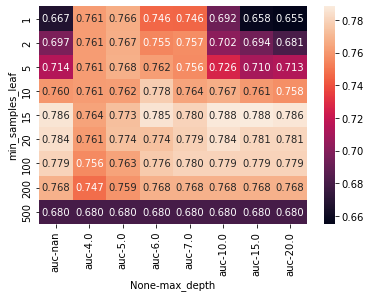

In [163]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [164]:
dt = DecisionTreeClassifier(max_depth =6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)


## 6.6 Ensembles and random forest

    Board of experts
    Ensembling models
    Random forest - ensembling decision trees
    Tuning random forest



In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [167]:
y_pred = rf.predict_proba(X_val[[0]])
y_pred

array([[0.9, 0.1]])

In [168]:
scores=[]
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))
    print("Est : %4s , roc_auc : %.3f " %(n,roc_auc_score(y_val,y_pred)))

Est :   10 , roc_auc : 0.774 
Est :   20 , roc_auc : 0.804 
Est :   30 , roc_auc : 0.815 
Est :   40 , roc_auc : 0.816 
Est :   50 , roc_auc : 0.817 
Est :   60 , roc_auc : 0.816 
Est :   70 , roc_auc : 0.817 
Est :   80 , roc_auc : 0.816 
Est :   90 , roc_auc : 0.817 
Est :  100 , roc_auc : 0.818 
Est :  110 , roc_auc : 0.818 
Est :  120 , roc_auc : 0.818 
Est :  130 , roc_auc : 0.818 
Est :  140 , roc_auc : 0.818 
Est :  150 , roc_auc : 0.817 
Est :  160 , roc_auc : 0.818 
Est :  170 , roc_auc : 0.818 
Est :  180 , roc_auc : 0.817 
Est :  190 , roc_auc : 0.818 
Est :  200 , roc_auc : 0.819 


In [169]:
df_rf_scores = pd.DataFrame(scores,columns=['n_estimators','auc'])
df_rf_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


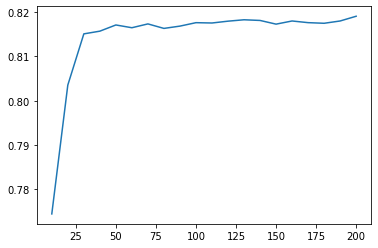

In [170]:
plt.plot(df_rf_scores.n_estimators,df_rf_scores.auc)

In [171]:
scores2 = []

for d in [5,10,15,18,20,25,None]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores2.append((d,n,auc))
        print("Depth : %s , Est : %4s , roc_auc : %.3f " %(d,n,roc_auc_score(y_val,y_pred)))

Depth : 5 , Est :   10 , roc_auc : 0.788 
Depth : 5 , Est :   20 , roc_auc : 0.798 
Depth : 5 , Est :   30 , roc_auc : 0.800 
Depth : 5 , Est :   40 , roc_auc : 0.800 
Depth : 5 , Est :   50 , roc_auc : 0.800 
Depth : 5 , Est :   60 , roc_auc : 0.801 
Depth : 5 , Est :   70 , roc_auc : 0.802 
Depth : 5 , Est :   80 , roc_auc : 0.803 
Depth : 5 , Est :   90 , roc_auc : 0.804 
Depth : 5 , Est :  100 , roc_auc : 0.804 
Depth : 5 , Est :  110 , roc_auc : 0.807 
Depth : 5 , Est :  120 , roc_auc : 0.806 
Depth : 5 , Est :  130 , roc_auc : 0.808 
Depth : 5 , Est :  140 , roc_auc : 0.807 
Depth : 5 , Est :  150 , roc_auc : 0.807 
Depth : 5 , Est :  160 , roc_auc : 0.807 
Depth : 5 , Est :  170 , roc_auc : 0.807 
Depth : 5 , Est :  180 , roc_auc : 0.807 
Depth : 5 , Est :  190 , roc_auc : 0.807 
Depth : 5 , Est :  200 , roc_auc : 0.807 
Depth : 10 , Est :   10 , roc_auc : 0.791 
Depth : 10 , Est :   20 , roc_auc : 0.808 
Depth : 10 , Est :   30 , roc_auc : 0.812 
Depth : 10 , Est :   40 , roc_a

In [172]:
df_rf_scores2 = pd.DataFrame(scores2,columns=['max_depth','n_estimators','auc'])
df_rf_scores2

,max_depth,n_estimators,auc
0,5.0,10,0.787699
1,5.0,20,0.797731
2,5.0,30,0.800305
3,5.0,40,0.799708
4,5.0,50,0.799878
...,...,...,...
135,NaN,160,0.817981
136,NaN,170,0.817606
137,NaN,180,0.817463
138,NaN,190,0.817981


In [173]:
df_rf_scores2[df_rf_scores2.max_depth ==5]

,max_depth,n_estimators,auc
0,5.0,10,0.787699
1,5.0,20,0.797731
2,5.0,30,0.800305
3,5.0,40,0.799708
4,5.0,50,0.799878
5,5.0,60,0.801167
6,5.0,70,0.802251
7,5.0,80,0.803244
8,5.0,90,0.803616
9,5.0,100,0.804452


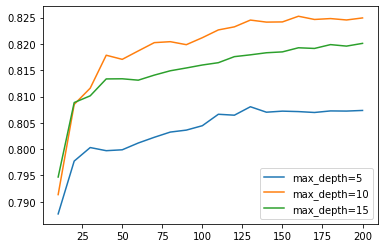

In [174]:
for d in [5,10,15]: 
    df_subset = df_rf_scores2[df_rf_scores2.max_depth ==d]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='max_depth=%d' %d)

plt.legend()

In [175]:
max_depth = 10

scores3 = []
for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=s,random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores3.append((s,n,auc))
        print("min_samples_leaf : %s , Est : %4s , roc_auc : %.3f " %(s,n,roc_auc_score(y_val,y_pred)))

min_samples_leaf : 1 , Est :   10 , roc_auc : 0.791 
min_samples_leaf : 1 , Est :   20 , roc_auc : 0.808 
min_samples_leaf : 1 , Est :   30 , roc_auc : 0.812 
min_samples_leaf : 1 , Est :   40 , roc_auc : 0.818 
min_samples_leaf : 1 , Est :   50 , roc_auc : 0.817 
min_samples_leaf : 1 , Est :   60 , roc_auc : 0.819 
min_samples_leaf : 1 , Est :   70 , roc_auc : 0.820 
min_samples_leaf : 1 , Est :   80 , roc_auc : 0.820 
min_samples_leaf : 1 , Est :   90 , roc_auc : 0.820 
min_samples_leaf : 1 , Est :  100 , roc_auc : 0.821 
min_samples_leaf : 1 , Est :  110 , roc_auc : 0.823 
min_samples_leaf : 1 , Est :  120 , roc_auc : 0.823 
min_samples_leaf : 1 , Est :  130 , roc_auc : 0.825 
min_samples_leaf : 1 , Est :  140 , roc_auc : 0.824 
min_samples_leaf : 1 , Est :  150 , roc_auc : 0.824 
min_samples_leaf : 1 , Est :  160 , roc_auc : 0.825 
min_samples_leaf : 1 , Est :  170 , roc_auc : 0.825 
min_samples_leaf : 1 , Est :  180 , roc_auc : 0.825 
min_samples_leaf : 1 , Est :  190 , roc_auc : 

In [176]:
df_rf_scores3 = pd.DataFrame(scores3,columns=['min_samples_leaf','n_estimators','auc'])
df_rf_scores3

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058
...,...,...,...
95,50,160,0.805929
96,50,170,0.805172
97,50,180,0.805324
98,50,190,0.805596


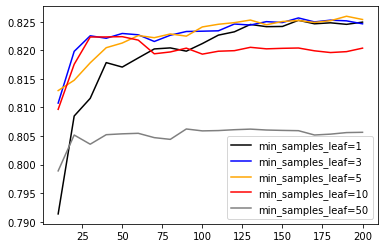

In [177]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]
for s,col in zip(values,colors): 
    df_subset = df_rf_scores3[df_rf_scores3.min_samples_leaf ==s]
    plt.plot(df_subset.n_estimators,df_subset.auc,color=col,label='min_samples_leaf=%d' %s)

plt.legend()

In [178]:
min_samples_leaf = 32
rf = RandomForestClassifier(n_estimators=125,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred).round(3)
auc

0.811

## 6.7 Gradient boosting and XGBoost¶

    Gradient boosting vs random forest
    Installing XGBoost
    Training the first model
    Performance monitoring
    Parsing xgboost's monitoring output



In [179]:
import xgboost as xgb

In [180]:
features = dv.get_feature_names()

dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)

dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)



In [181]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 0,

    'seed' : 1,
    'verbosity': 1,

}

model = xgb.train(xgb_params,dtrain,num_boost_round=10)


[09:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [182]:
y_pred = model.predict(dval)

In [183]:
roc_auc_score(y_val,y_pred)

0.8152745150274878

In [184]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [185]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [186]:
s = output.stdout

In [187]:
print(s[:200])

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	tr


In [188]:
(output.stdout.strip().split('\n'))[0]

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [189]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [190]:
df_score = parse_xgb_output(output)

In [194]:
df_score

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775
5,25,0.98174,0.81878
6,30,0.98772,0.81788
7,35,0.99180,0.81510
8,40,0.99456,0.81387
9,45,0.99596,0.81462


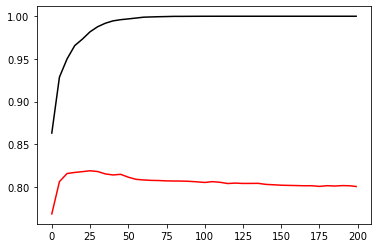

In [191]:
plt.plot(df_score.num_iter,df_score.train_auc,color='black',label='train')
plt.plot(df_score.num_iter,df_score.val_auc,color='red',label='val')

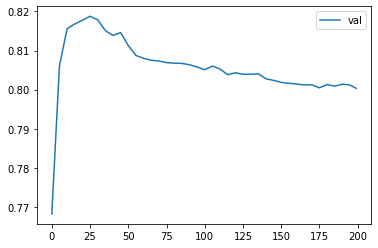

In [192]:
plt.plot(df_score.num_iter,df_score.val_auc,label='val')
plt.legend()

## 6.8 XGBoost parameter tuning

Tuning the following parameters:

    eta
    max_depth
    min_child_weight



In [210]:
scores = {}

In [217]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [218]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [222]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=0.05'])

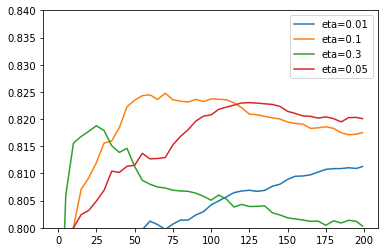

In [223]:


for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.ylim(0.8, 0.84)
plt.legend()



In [249]:
scores1={}

In [259]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [260]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores1[key] = parse_xgb_output(output)
key

'max_depth=4'

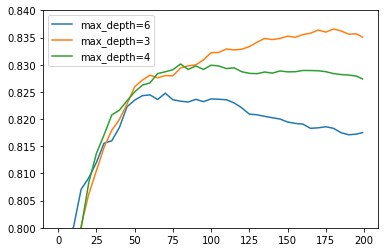

In [261]:
for max_depth, df_score in scores1.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()


In [262]:
scores2={}

In [270]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [271]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores2[key] = parse_xgb_output(output)
key

'min_child_weight=30'

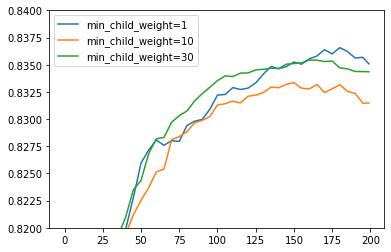

In [272]:
for min_child_weight, df_score in scores2.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

In [273]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## 6.9 Selecting the final model

    Choosing between xgboost, random forest and decision tree
    Training the final model
    Saving the model



In [274]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [275]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7852498123077667

In [276]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [277]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [278]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [279]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [280]:


df_full_train = df_full_train.reset_index(drop=True)



In [281]:
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']


In [282]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [283]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [284]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [285]:
y_pred = model.predict(dtest)

In [286]:
roc_auc_score(y_test, y_pred)

0.8322662626460096


## 6.10 Summary

    Decision trees learn if-then-else rules from data.



    Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.



    Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.



    Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.

